# Normalization of Black body function and it's integral
$$F_0^\lambda(\lambda,T) = \int_0^{+\lambda} \frac{b_\lambda(\lambda,T)}{sigma*T^4} d\lambda $$

$$ X = \lambda*T $$
$$dX = T d\lambda$$

$$F_0^\lambda(\lambda,T) = \frac{1}{sigma} \int_0^{X=\lambda*T}\frac{c_1}{X^5\left( \exp\left(\frac{c_2}{X}\right)-1 \right)} dX $$


In [ ]:
# %matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.constants import sigma

In [117]:
from scipy.constants import pi, c, h, k, sigma
def normalizedF(x):
    from scipy.constants import k,h,c,pi
    from numpy import exp
    #s = sigma
    # here we could also import all the constants from scipy.constants
    #k = 1.38054e-23 # J/K
    #h = 6.6256e-34 # Js
    #s = 5.6703e-8 # W/(m^2 K^4)
    #c = 2.997e8 # m/s
    c1= 2*pi*c**2*h
    c2= c*h/k
    el = c1/(x**5*(exp(c2/(x))-1))
    e2 = el/sigma
    return(e2)

In [205]:
T = 6000
lam=np.arange(400,700,0.1)*1e-9
x = lam*T

In [206]:
x, normalizedF(x)


(array([0.0024   , 0.0024006, 0.0024012, ..., 0.0041982, 0.0041988,
        0.0041994]),
 array([206.98512681, 207.03734595, 207.08948866, ..., 169.86631082,
        169.83092003, 169.7955308 ]))

In [207]:
F_x = normalizedF(x)
x_left= x[0:-1]
x_right = x[1:]
F0_left = F_x[0:-1]
F0_right = F_x[1:]
Dx = x_right - x_left
My = 0.5*(F0_right+F0_left)
Area = Dx*My
np.sum(Area[0:1])
percentage = Area*100
Q = np.sum(percentage)
P = np.sum(Area[0:76])*100
print(f"For lambda*T=1.884mmK, the percentage of Spectral Excitance for that range is {P:.2f}%")

For lambda*T=1.884mmK, the percentage of Spectral Excitance for that range is 0.95%


In [208]:
print(f"For the sample wavelengths, the percentage of Spectral Excitance for that range is {Q:.2f}%")

For the sample wavelengths, the percentage of Spectral Excitance for that range is 37.56%


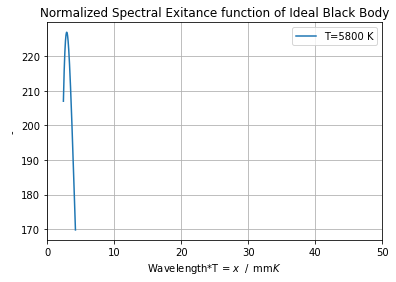

In [209]:

fig1, ax1 = plt.subplots(1,1)

ax1.plot(x*1e3,F_x)
ax1.set_xlim(np.array([0,50]))
plt.grid(True)

ax1.set_title(r'Normalized Spectral Exitance function of Ideal Black Body')
ax1.set_xlabel(r'Wavelength*T = $x \;\;/\;\; \mathrm{mm}K$')
ax1.set_ylabel(r'-')

ax1.legend([f"T=5800 K"])
plt.show()
##????